Live Code

Nama: Akbar Fitriawan  
Batch: HCK-14

Tentang Dataset:
Asuaransi kesehatan

Objective:
prediksi total tagihan

In [343]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np
# library statistik
from scipy import stats

# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler


# Pemodelan ML
from sklearn.linear_model import LinearRegression

# Evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from feature_engine.outliers import Winsorizer
from scipy.stats import pearsonr, kendalltau, spearmanr

# Save model
import pickle
import joblib
import json

# Load Data

In [344]:
df = pd.read_csv('/content/insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [345]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory data analysis

- Deskripsi

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [347]:
overweight_1 = df[(df['bmi'] <= 30) & (df['bmi'] < 35)]
overweight_1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
7,37,female,27.740,3,no,northwest,7281.50560
...,...,...,...,...,...,...,...
1324,31,male,25.935,1,no,northwest,4239.89265
1328,23,female,24.225,2,no,northeast,22395.74424
1330,57,female,25.740,2,no,southeast,12629.16560
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: ylabel='bmi'>

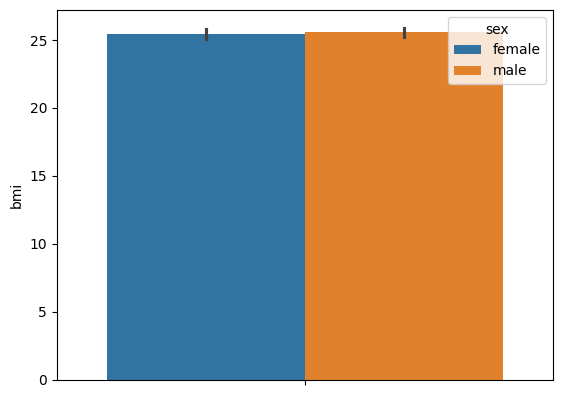

In [348]:
sns.barplot(y='bmi', data=overweight_1, hue='sex')

In [349]:
overweight_2 = df[(df['bmi'] > 35) | (df['bmi'] < 40)]

overweight_2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='sex', ylabel='bmi'>

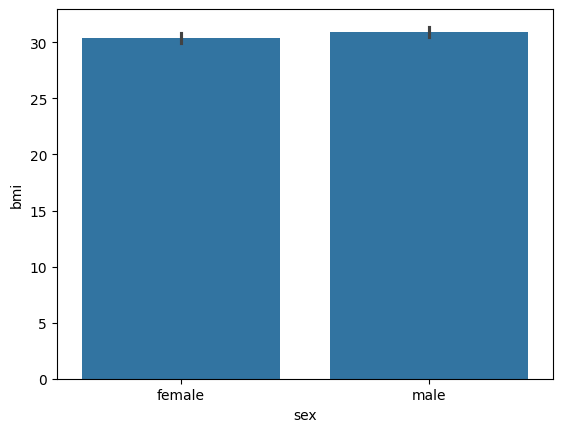

In [350]:
sns.barplot(x='sex', y='bmi', data=overweight_2, )

In [351]:
overweight_3= df[(df['bmi'] > 40) ]
overweight_3

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
18,56,male,40.30,0,no,southwest,10602.3850
83,48,female,41.23,4,no,northwest,11033.6617
116,58,male,49.06,0,no,southeast,11381.3254
170,63,male,41.47,0,no,southeast,13405.3903
...,...,...,...,...,...,...,...
1240,52,male,41.80,2,yes,southeast,47269.8540
1312,34,male,42.90,1,no,southwest,4536.2590
1317,18,male,53.13,0,no,southeast,1163.4627
1323,42,female,40.37,2,yes,southeast,43896.3763


# check cardinality

In [352]:
col_cat = list(df.select_dtypes(include=['object']).columns)

cat_uniq = []

for col in col_cat:
  cat_uniq.append([col, df[col].nunique()])


cat = pd.DataFrame(data=cat_uniq,columns=['kolom kategory', 'unique value'])
cat

,kolom kategory,unique value
0,sex,2
1,smoker,2
2,region,4


In [353]:
df.describe(include='number')

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Spliting data

In [354]:
X = df.drop('charges', axis=1)
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [355]:
print('ukuran X_train: ',X_train.shape)
print('ukuran y_train:', y_train.shape)
print('')

print('ukuran X_test: ',X_test.shape)
print('ukuran y_test: ',y_test.shape)

ukuran X_train:  (1070, 6)
ukuran y_train: (1070,)

ukuran X_test:  (268, 6)
ukuran y_test:  (268,)


In [356]:
X_train

,age,sex,bmi,children,smoker,region
425,45,male,24.310,5,no,southeast
851,61,male,32.300,2,no,northwest
22,18,male,34.100,0,no,southeast
386,58,female,39.050,0,no,southeast
560,46,female,19.950,2,no,northwest
...,...,...,...,...,...,...
356,46,male,43.890,3,no,southeast
960,19,female,39.615,1,no,northwest
812,54,male,21.010,2,no,southeast
132,53,female,35.900,2,no,southwest


In [357]:
X_test

,age,sex,bmi,children,smoker,region
1231,20,female,21.800,0,yes,southwest
768,64,female,39.700,0,no,southwest
847,23,male,50.380,1,no,southeast
510,56,male,32.110,1,no,northeast
363,21,female,26.400,1,no,southwest
...,...,...,...,...,...,...
882,21,female,22.135,0,no,northeast
1039,19,male,27.265,2,no,northwest
874,44,male,21.850,3,no,northeast
757,47,female,27.830,0,yes,southeast


- check missing value

In [358]:
X_train.isna().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [359]:
X_test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [360]:
y_train_cleaned = y_train[X_train.index]

In [361]:
y_test_cleaned = y_test[X_test.index]

In [362]:
# Filer Numerical Columns into Variable
kolom_numerik = X_train.select_dtypes(include=np.number).columns.to_list()

# Making data and columns for normal distribution
data_numerik_normal = []
kolom_numerik_normal = []

# Making data and columns for skewed distribution
data_numerik_skewed = []
kolom_numerik_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for kolom in kolom_numerik:
    skewness = X_train[kolom].skew()

    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:
        kolom_numerik_normal.append(kolom)
        data_numerik_normal.append([kolom, skewness])

    # Elif the data is skewed
    elif skewness < -0.5 or skewness > 0.5:
        kolom_numerik_skewed.append(kolom)
        data_numerik_skewed.append([kolom, skewness])

In [363]:
dfNormal = pd.DataFrame(data=data_numerik_normal ,columns=['kolom_ditribusi-normal', 'skewness'])

dfNormal

,kolom_ditribusi-normal,skewness
0,age,0.079252
1,bmi,0.268417


In [364]:
dfNormal = pd.DataFrame(data=data_numerik_skewed ,columns=['kolom_ditribusi-normal', 'skewness'])
dfNormal

,kolom_ditribusi-normal,skewness
0,children,0.961076


In [365]:
# Capping Method for Normal Distribution
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_numerik_normal,
                            missing_values='ignore')

# Fit & Transforming X_train
X_train_capped = winsorizer_normal_dist.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test)

In [366]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=kolom_numerik_skewed,
                            missing_values='ignore')

# Fit & Transforming X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

In [367]:
num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist()

In [368]:
print('Categorical Columns :', cat_columns)
print('Numerical Columns :', num_columns)

Categorical Columns : ['sex', 'smoker', 'region']
Numerical Columns : ['age', 'bmi', 'children']


In [369]:
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

In [370]:
X_test_cat

,sex,smoker,region
1231,female,yes,southwest
768,female,no,southwest
847,male,no,southeast
510,male,no,northeast
363,female,no,southwest
...,...,...,...
882,female,no,northeast
1039,male,no,northwest
874,male,no,northeast
757,female,yes,southeast


# Encoding

In [371]:
#Initialize the MinMaxScaler
scaler = MinMaxScaler()

#Fit_transform for X_train, transform for X_test
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.58695652, 0.25494647, 1.        ],
       [0.93478261, 0.49890123, 0.4       ],
       [0.        , 0.55385975, 0.        ],
       ...,
       [0.7826087 , 0.15418918, 0.4       ],
       [0.76086957, 0.60881827, 0.4       ],
       [0.30434783, 0.39600667, 0.2       ]])

In [372]:
#Initialize the OneHotEncoder

# Initialize the OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Fit_transform for X_train, transform for X_test
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [373]:
# Concate
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

# Transform into dataframe
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

In [374]:
X_train_final

,0,1,2,3,4,5,6,7,8,9,10
0,0.586957,0.254946,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.934783,0.498901,0.4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.553860,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.869565,0.704996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.608696,0.121825,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1065,0.608696,0.852773,0.6,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1066,0.021739,0.722247,0.2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1067,0.782609,0.154189,0.4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1068,0.760870,0.608818,0.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# membuat model

In [375]:
linreg = LinearRegression()

In [376]:
linreg.fit(X_train_final, y_train_cleaned)

LinearRegression()

### Model Evaluation

In [377]:
y_pred_train = linreg.predict(X_train_final)
y_pred_test = linreg.predict(X_test_final)

print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

MAE - Train Set :  4221.506058564526
MAE - Test Set  :  4109.834966339937


In [378]:
print('MSE - Train Set : ', mean_squared_error(y_train, y_pred_train))
print('MSE - Test Set  : ', mean_squared_error(y_test, y_pred_test))

MSE - Train Set :  36733042.46885234
MSE - Test Set  :  35786614.2400957


In [379]:
print('r2 score - Train Set : ', r2_score(y_train, y_pred_train))
print('r2 score - Test Set  : ', r2_score(y_test, y_pred_test))

r2 score - Train Set :  0.7490647875494298
r2 score - Test Set  :  0.756769928168117


In [380]:
data_eval={
    'act':y_test,
    'pred': y_pred_test
}

df_eval= pd.DataFrame(data_eval)
df_eval

,act,pred
1231,20167.33603,23182.647265
768,14319.03100,17495.089049
847,2438.05520,9806.786531
510,11763.00090,13655.111097
363,2597.77900,1950.607187
...,...,...
882,2585.85065,700.529425
1039,22493.65964,2414.763774
874,8891.13950,7811.369210
757,23065.42070,32149.781833


## Save Model & Preprocessing


In [381]:
with open('model_linreg.pkl', 'wb') as file1:
  joblib.dump(linreg, file1)

with open('enc_ord.pkl', 'wb') as file2:
  joblib.dump(ord_enc, file2)

with open('enc_ohe.pkl', 'wb') as file3:
  joblib.dump(enc_ohe, file3)

with open('mm_scaler.pkl', 'wb') as file4:
  joblib.dump(mm_scaler, file4)

In [382]:
# Load model & Preprocessing
with open('model_linreg.pkl', 'rb') as file1:
  model_linreg= joblib.load(file1)

with open('enc_ord.pkl', 'rb') as file2:
  enc_ord= joblib.load(file2)

with open('enc_ohe.pkl', 'rb') as file3:
  enc_ohe= joblib.load(file3)

with open('mm_scaler.pkl', 'rb') as file4:
  mm_scaler= joblib.load(file4)

## Model Inference

In [383]:
data_inf= {
    'age': [20, 30],
    'sex': ['male', 'female'],
    'bmi':[46.5, 30.5],
    'children': [3, 0],
    'smoker': ['yes','no'],
    'region': ['southeast','northwest']
}

df_inf_test= pd.DataFrame(data_inf)

In [384]:
df_inf_test

,age,sex,bmi,children,smoker,region
0,20,male,46.5,3,yes,southeast
1,30,female,30.5,0,no,northwest


In [385]:
df_inf= df_inf_test.copy()